<a href="https://colab.research.google.com/github/kscoder27/Stock-Price-Prediction-using-machine-learning/blob/main/aiproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving HistoricalData5year.csv to HistoricalData5year.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv('HistoricalData5year.csv')


data.columns = data.columns.str.strip()


data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

data['Close/Last'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)


prices = data['Close/Last'].values.reshape(-1, 1)


print(data.head())

           Date  Close/Last     Open     High      Low
1257 2019-11-12     3091.84  3089.28  3102.61  3084.73
1256 2019-11-13     3094.04  3084.18  3098.06  3078.80
1255 2019-11-14     3096.63  3090.75  3098.20  3083.26
1254 2019-11-15     3120.46  3107.92  3120.46  3104.60
1253 2019-11-18     3122.03  3117.91  3124.17  3112.06


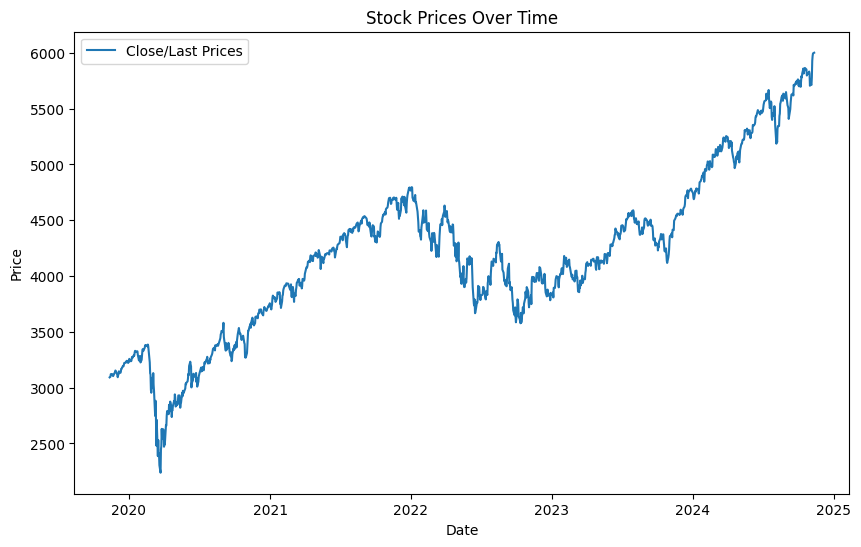

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close/Last'], label='Close/Last Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)


seq_length = 60


X, y = create_sequences(prices_scaled, seq_length)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


X_train_tensors = torch.FloatTensor(X_train)
y_train_tensors = torch.FloatTensor(y_train)
X_test_tensors = torch.FloatTensor(X_test)
y_test_tensors = torch.FloatTensor(y_test)


train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
test_dataset = TensorDataset(X_test_tensors, y_test_tensors)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


input_size = 1
hidden_size = 50
num_layers = 3
model = LSTMModel(input_size, hidden_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader):.4f}')

Epoch 1/40, Loss: 0.0006
Epoch 2/40, Loss: 0.0006
Epoch 3/40, Loss: 0.0006
Epoch 4/40, Loss: 0.0006
Epoch 5/40, Loss: 0.0006
Epoch 6/40, Loss: 0.0006
Epoch 7/40, Loss: 0.0006
Epoch 8/40, Loss: 0.0006
Epoch 9/40, Loss: 0.0006
Epoch 10/40, Loss: 0.0006
Epoch 11/40, Loss: 0.0006
Epoch 12/40, Loss: 0.0005
Epoch 13/40, Loss: 0.0005
Epoch 14/40, Loss: 0.0005
Epoch 15/40, Loss: 0.0005
Epoch 16/40, Loss: 0.0005
Epoch 17/40, Loss: 0.0005
Epoch 18/40, Loss: 0.0005
Epoch 19/40, Loss: 0.0005
Epoch 20/40, Loss: 0.0004
Epoch 21/40, Loss: 0.0004
Epoch 22/40, Loss: 0.0004
Epoch 23/40, Loss: 0.0005
Epoch 24/40, Loss: 0.0004
Epoch 25/40, Loss: 0.0004
Epoch 26/40, Loss: 0.0005
Epoch 27/40, Loss: 0.0004
Epoch 28/40, Loss: 0.0005
Epoch 29/40, Loss: 0.0004
Epoch 30/40, Loss: 0.0004
Epoch 31/40, Loss: 0.0004
Epoch 32/40, Loss: 0.0004
Epoch 33/40, Loss: 0.0004
Epoch 34/40, Loss: 0.0004
Epoch 35/40, Loss: 0.0004
Epoch 36/40, Loss: 0.0004
Epoch 37/40, Loss: 0.0003
Epoch 38/40, Loss: 0.0004
Epoch 39/40, Loss: 0.

In [ ]:
model.eval()
test_loss = 0
predictions = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
        predictions.append(outputs)

print(f'Test Loss: {test_loss/len(test_loader):.4f}')

Test Loss: 0.0012


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model.eval()
test_loss = 0
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()


        predictions.extend(outputs.numpy())
        actuals.extend(y_batch.numpy())


predictions = np.array(predictions).flatten()
actuals = np.array(actuals).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f'Test Loss: {test_loss/len(test_loader):.4f}')
print(f'RMSE: {rmse:.4f}')

Test Loss: 0.0012
RMSE: 0.0322


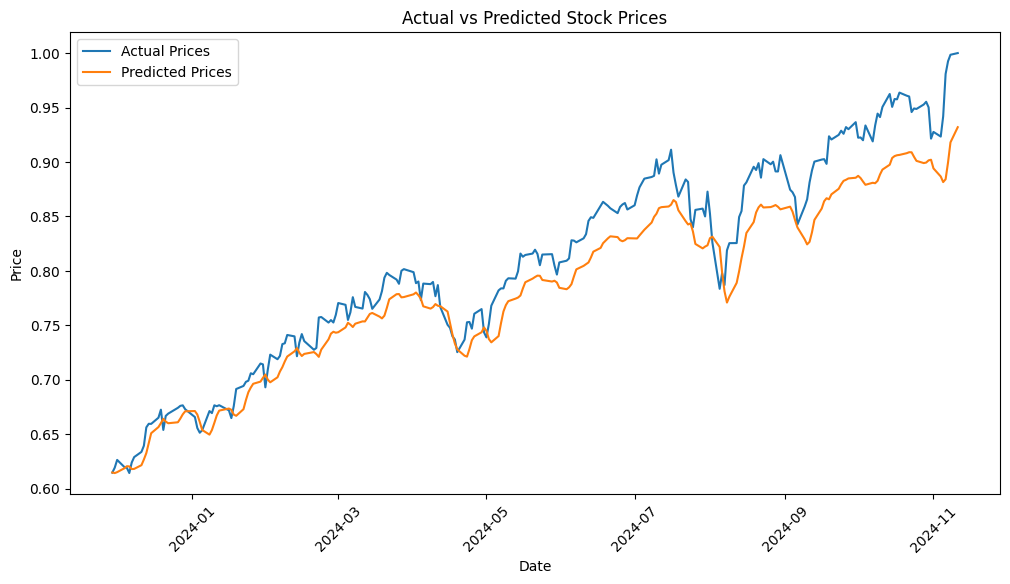

In [ ]:
test_dates = data['Date'][-len(actuals):]


plt.figure(figsize=(12, 6))
plt.plot(test_dates, actuals, label='Actual Prices')
plt.plot(test_dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()